In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile

In [ ]:
data = zipfile.ZipFile('/content/heartdeaseas.zip')
data.extractall()
data.close()

In [ ]:
data_pd = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
data_pd.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data_pd.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
x=data_pd.drop('target',axis=1)
y=data_pd['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
len(x_train),len(x_test)

(952, 238)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(256,input_shape=(11,)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.7658
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.7700
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.7616
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.7700
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7742
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7679 - accuracy: 0.7437
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7542 - accuracy: 0.7616
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.7920
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.7773
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.7574
Epoch 11/50
30/30 [

In [ ]:
pred=model.predict(x_test)
val=[]
for i in pred.squeeze():
  if i>=0.5:
    val.append(1)
  else:
    val.append(0)


8/8 [==============================] - 0s 2ms/step


390     True
247     True
260     True
155     True
984     True
        ... 
535     True
1037    True
812     True
139     True
599     True
Name: target, Length: 238, dtype: bool

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

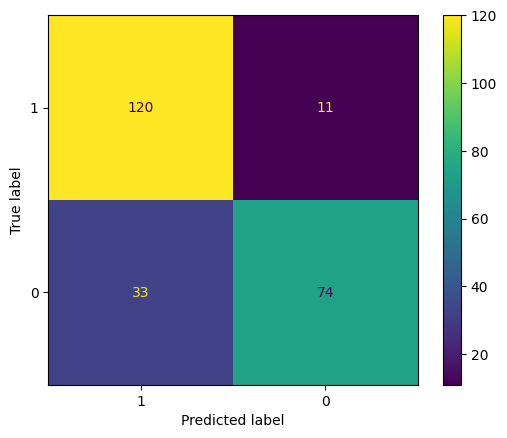

In [ ]:
cm = confusion_matrix(y_test, val, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.93      0.95      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [ ]:
predictions==y_test

390      True
247     False
260      True
155      True
984      True
        ...  
535      True
1037    False
812      True
139      True
599      True
Name: target, Length: 238, dtype: bool

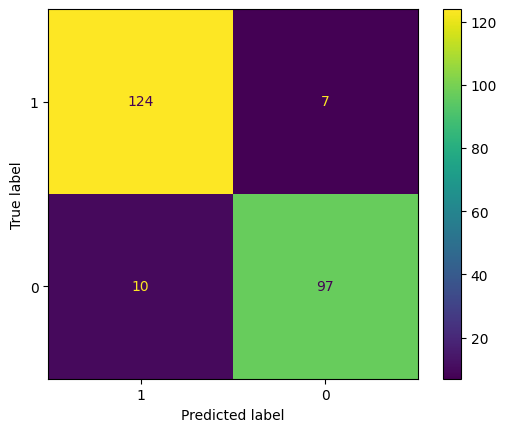

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [ ]:
x_test.to_numpy()[0:1]

array([[ 61.,   1.,   4., 160.,   0.,   1.,   1., 145.,   0.,   1.,   2.]])

In [ ]:
import pickle

In [ ]:
arr = np.array([[ 61.,   1.,   4., 160.,   0.,   1.,   1., 145.,   0.,   1.,   2.]])

In [ ]:
with open('model_heart.pkl','wb') as f:
    pickle.dump(clf,f)

# load
with open('model_heart.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(arr)

array([1])